In [2]:
import numpy as np
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

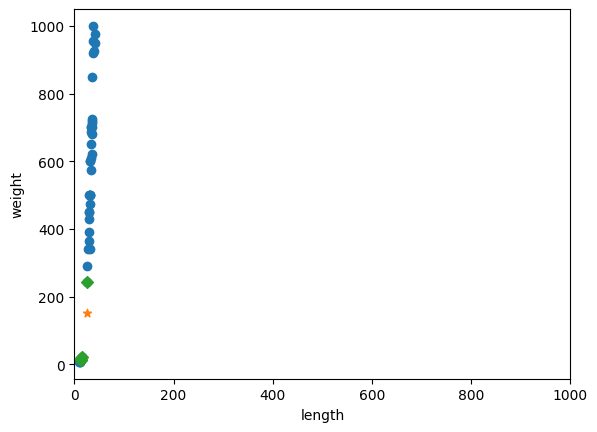

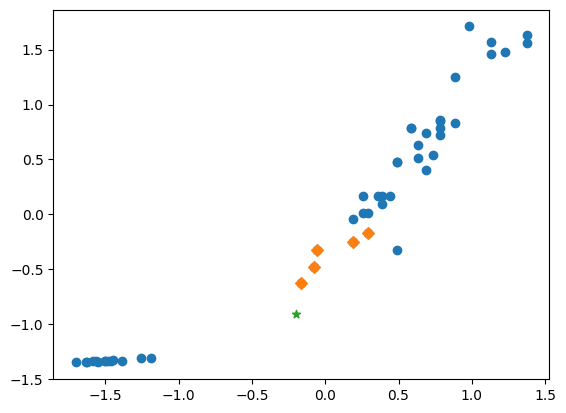

In [3]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(fish_data, fish_target)

# 왜? 도미가 안나오나 ...
kn.predict([[25, 150]])
distances, indexes = kn.kneighbors([[25, 150]])

import matplotlib.pyplot as plt
plt.scatter(fish_data[:,0], fish_data[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.scatter(25, 150, marker="*")
plt.scatter(fish_data[indexes,0], fish_data[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.show()

# 표준점수(standard score)
# 표준점수 = (데이터 - 평균) / 표준편차
mean = np.mean(fish_data, axis=0)
std = np.std(fish_data, axis=0)
train_scaled = (fish_data - mean) / std

# 학습
kn.fit(train_scaled, fish_target)
domi = [25, 150]
domi_scaled =  (domi - mean) / std
kn.predict([domi_scaled])

# 산점도 다시 그려 보기 ( 이웃 포함 )
distances, indexes = kn.kneighbors([domi_scaled])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.scatter(domi_scaled[0], domi_scaled[1], marker='*')
plt.show()